In [9]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import importlib

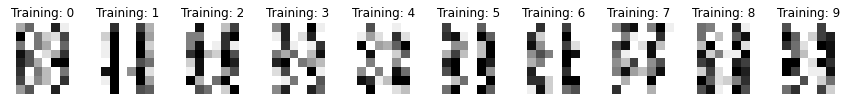

In [10]:
obfuscator = importlib.machinery.SourceFileLoader('obfuscator', './obfuscator.py').load_module()
X, y = obfuscator.get_obfuscated_dataset()
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 3))
for ax, image, label in zip(axes, X, y):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [11]:
n_samples = len(X)
print(f"A total of {n_samples} images are in this dataset")

A total of 1797 images are in this dataset


In [12]:
from sklearn.neural_network import MLPClassifier as mlpc

data = X.reshape((n_samples, -1))

clf = mlpc()

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.5)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
print(predicted)

[5 9 9 2 0 9 8 6 5 5 7 7 4 9 9 7 9 7 9 5 3 0 4 5 5 1 0 7 4 4 6 3 2 0 8 5 8
 4 2 7 2 0 5 7 4 6 6 7 2 0 2 1 4 6 9 9 3 2 7 6 0 2 9 4 1 1 2 5 0 8 5 1 9 4
 2 4 9 0 5 1 7 7 6 8 7 2 0 3 9 1 7 3 4 0 9 5 9 0 1 0 2 2 5 1 4 3 6 1 2 5 1
 8 4 1 5 0 7 0 5 9 8 9 5 5 6 1 9 1 5 6 9 4 1 2 0 4 9 8 8 3 1 8 4 8 8 0 8 5
 3 7 9 0 7 9 2 6 4 3 0 3 8 8 3 0 1 2 9 3 3 9 4 9 7 8 1 8 0 6 5 0 9 2 5 2 3
 2 5 2 7 7 2 2 4 1 3 7 7 6 3 1 4 4 5 1 2 1 8 9 0 8 6 3 2 8 3 7 8 4 1 5 7 0
 5 5 9 1 0 5 4 5 2 6 6 3 3 8 7 5 6 1 9 2 0 5 2 5 2 1 6 1 9 4 8 5 4 6 0 9 7
 6 5 9 8 9 7 1 7 4 6 4 8 3 7 5 0 9 8 6 9 3 6 7 8 1 8 0 3 2 6 9 8 0 0 7 7 2
 6 0 9 1 8 6 1 6 2 4 6 2 3 5 5 9 9 5 8 7 6 6 1 5 1 6 1 6 3 4 1 6 2 1 3 0 0
 3 0 1 4 8 2 1 0 4 9 3 1 1 6 2 5 8 2 7 5 9 2 9 0 5 4 3 2 5 1 5 6 6 9 8 9 7
 6 5 9 7 0 2 1 4 2 5 5 3 3 0 4 6 9 2 1 2 4 4 8 4 7 8 8 7 1 2 9 4 6 6 6 7 8
 8 7 2 4 4 3 4 6 4 1 1 2 9 0 1 3 6 0 1 0 5 8 5 8 3 0 6 0 6 0 8 1 7 4 7 4 5
 3 9 7 6 4 4 3 0 6 2 7 7 1 5 8 5 0 5 2 8 3 5 0 4 6 9 4 1 9 1 4 9 2 4 7 5 3
 3 3 8 9 5 1 5 6 5 7 4 2 

In [13]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier MLPClassifier():
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        89
           1       0.96      0.94      0.95        94
           2       1.00      0.99      0.99        94
           3       0.98      0.98      0.98        89
           4       0.98      0.92      0.95        92
           5       0.96      0.97      0.96        92
           6       0.93      0.99      0.96        94
           7       0.99      0.98      0.98        87
           8       0.92      0.94      0.93        78
           9       0.94      0.97      0.95        90

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899




Confusion matrix:
[[86  0  0  0  1  0  2  0  0  0]
 [ 0 88  0  0  0  0  3  0  3  0]
 [ 0  0 93  0  0  0  0  0  1  0]
 [ 0  0  0 87  0  1  0  0  1  0]
 [ 0  3  0  0 85  0  1  1  0  2]
 [ 0  0  0  1  0 89  1  0  0  1]
 [ 1  0  0  0  0  0 93  0  0  0]
 [ 0  0  0  1  0  0  0 85  0  1]
 [ 0  0  0  0  1  2  0  0 73  2]
 [ 0  1  0  0  0  1  0  0  1 87]]


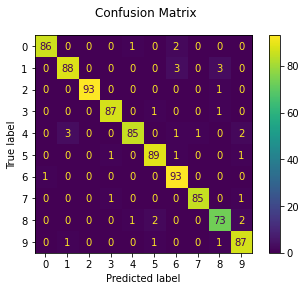

In [14]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()